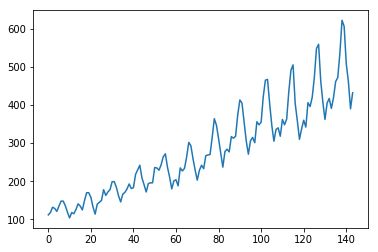

In [12]:
from pandas import read_csv
import matplotlib.pyplot as plt
#read the file 
dataframe = read_csv('international-airline-passengers.csv',usecols=[1],engine='python',skipfooter=3)
plt.plot(dataframe)
plt.show()


In [13]:
#Let us do mlp
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
import math
from keras.layers import Dense
#fix the random seed
np.random.seed(7)

In [14]:
#extract NumPy
dataset = dataframe.values
dataset = dataset.astype('float32')


In [15]:
#Split dataset into train and test set 
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
# now create train and test set 
train, test = dataset[0:train_size,:],dataset[train_size:,:]

In [16]:
#Now create convert dataset to matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
#for i in range(len(trainX)): 
#    print(str(trainX[i]) + ' ' + str(trainY[i])) 

In [18]:
# create a mlp model 
model = Sequential()
#I input layer with 8 neurons  1 output layer
model.add(Dense(8,input_dim=look_back,activation='relu'))
model.add(Dense(1))
#For 2D input shape
#Input Tensor shape (batchsize,input_dim) and output Tensor is (batchsize, units)

#Before we train model using fit method we need to configure up learning process
#using comiple method - there are 3 inputs to compile method
# 1. optimizer => this is stringfied representation of optimizer 
# 2. loss => objective or loss function 

# Here in this example as we are doing linear regression  - minimizing mean squared error is our objective function.
#For Binary Classification objective function binary_crossentropy
#For multiclass classification 

#optimizers

model.compile(loss='mean_squared_error' , optimizer= 'adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=0)

In [19]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE) ' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)'  % (testScore, math.sqrt(testScore)))

Train Score: 531.71 MSE (23.06 RMSE) 
Test Score: 2355.06 MSE (48.53 RMSE)


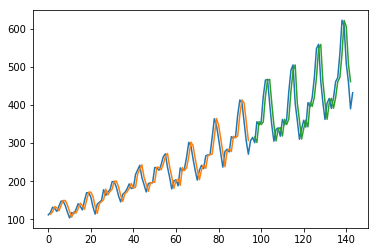

In [20]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()